In [83]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
path = "../data/raw/player_raw_data.csv"
df = pd.read_csv(path)
df.head()
#train_df , test_df = train_test_split()

,name,country,age,overall,potential,club,best_position,value,wage,Crossing,...,Vision,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,Diving,Handling,Kicking,Reflexes
0,Greg Halford,England,36,59,59,Waterford FC,CB,€40K,€500,53,...,52,61,61,59,61,59,12,16,11,14
1,Santiago Silva,Uruguay,40,71,71,Club Atlético Aldosivi,ST,€0,€7K,52,...,68,74,76,37,39,34,13,11,13,15
2,Sammy Bossut,Belgium,35,69,69,SV Zulte Waregem,GK,€150K,€4K,12,...,49,17,47,22,14,13,67,70,63,68
3,Marcelo Barovero,Argentina,37,70,70,Club Atlético de San Luis,GK,€180K,€5K,14,...,51,20,64,19,16,14,68,66,63,71
4,Enrique Bologna,Argentina,39,72,72,Club Atlético Banfield,GK,€250K,€5K,21,...,53,25,65,12,22,17,74,67,72,74


In [27]:
df.columns

Index(['name', 'country', 'age', 'overall', 'potential', 'club',
       'best_position', 'value', 'wage', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short passing', 'Volleys', 'Dribbling', 'Curve',
       'Fk Accuracy', 'Long Passing', 'Ball Control', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Defensive Awareness', 'Standing Tackle', 'Sliding Tackle', 'Diving',
       'Handling', 'Kicking', 'Reflexes'],
      dtype='object')

In [50]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=123)

In [66]:
numeric_feats = ["age", "overall", "potential", 
                 "Crossing","Finishing", "Heading Accuracy", 
                 "Short passing", "Volleys", "Dribbling", "Curve",
                "Fk Accuracy", "Long Passing", "Ball Control",
                "Acceleration", "Sprint Speed", "Agility", "Reactions",
                "Balance", "Shot Power", "Jumping", "Stamina", "Strength",
                "Long Shots", "Aggression", "Interceptions", "Positioning", "Vision",
                "Penalties", "Composure", "Defensive Awareness", "Standing Tackle",
                "Sliding Tackle",  "Diving", "Handling", "Kicking", "Reflexes"]
categorical_feats = ["country"] # "name"
drop_feats = ["value", "wage", "name"]
#passthrough_feats = ["name"]


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [74]:
preprocessor = make_column_transformer(
    (
        make_pipeline(SimpleImputer(), StandardScaler()),
        numeric_feats,
    ),  # scaling on numeric features
    (
        OneHotEncoder(handle_unknown="ignore", sparse = False),
        categorical_feats,
    ),  # OHE on categorical features
    #("passthrough", passthrough_feats),  # no transformations on the binary features
    ("drop", drop_feats),
)

In [80]:
trans = preprocessor.fit_transform(train_df)


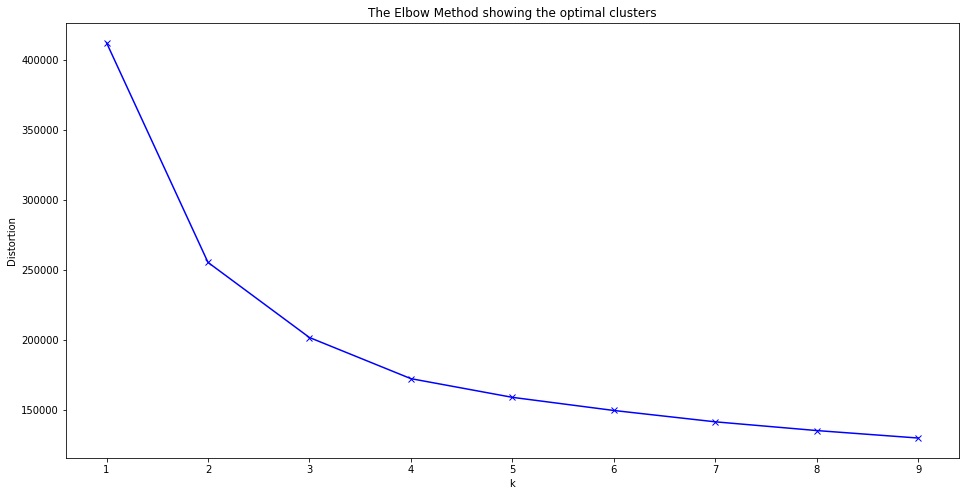

In [88]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(trans)
    distortions.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal clusters")
plt.show()    

In [97]:
# Define Model
kmeans_model = KMeans(n_clusters=9, random_state=3021)

# Fit into dataset fit
kmeans_predict = kmeans_model.fit_predict(trans)

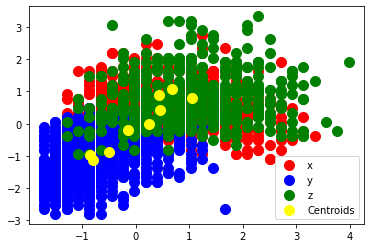

In [99]:
train_df["Cluster"] = kmeans_predict

# Visualising the clusters
plt.scatter(trans[kmeans_predict == 0, 0], trans[kmeans_predict == 0, 1], s = 100, c = "red", label = "x")
plt.scatter(trans[kmeans_predict == 1, 0], trans[kmeans_predict == 1, 1], s = 100, c = "blue", label = "y")
plt.scatter(trans[kmeans_predict == 2, 0], trans[kmeans_predict == 2, 1], s = 100, c = "green", label = "z")
# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = "yellow", label = "Centroids")
plt.legend();
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)

In [173]:
results_dict = {}
d = {}
for i in range(0,9):
    df = train_df.query(f"Cluster == {i}")
    d[f"Cluster {i}"] =  df[["best_position"]]

In [190]:
c0 = d["Cluster 0"]
c1 = d["Cluster 1"]
c2 = d["Cluster 2"]
c3 = d["Cluster 3"]
c4 = d["Cluster 4"]
c5 = d["Cluster 5"]
c6 = d["Cluster 6"]
c7 = d["Cluster 7"]
c8 = d["Cluster 8"]

clusters = [c0,c1,c2,c3,c4,c5,c6,c7,c8]

In [193]:
col = "best_position"
for c in clusters:
    print(c[col].unique())
    print(c[col].value_counts())

['CB', 'CDM', 'RB', 'RWB', 'LB', 'LWB', 'CM']
Categories (7, object): ['CB', 'CDM', 'CM', 'LB', 'LWB', 'RB', 'RWB']
CB     1029
CDM      99
RB       19
LB       15
LWB       4
RWB       4
CM        3
Name: best_position, dtype: int64
['ST' 'CM' 'LM' 'RW' 'CAM' 'LW' 'RM' 'CDM' 'RB' 'LWB' 'LB' 'CF' 'RWB']
ST     390
LM     244
CAM    235
RM     234
LW     144
RW     137
CM     117
CF      28
RB      10
LB       7
CDM      4
LWB      3
RWB      1
Name: best_position, dtype: int64
['GK']
GK    478
Name: best_position, dtype: int64
['CDM' 'CAM' 'LB' 'CB' 'CM' 'RB' 'LM' 'RWB' 'RM' 'RW' 'LWB' 'ST' 'LW' 'CF']
CM     592
CDM    387
RB     333
LB     321
CAM    101
RWB     87
RM      81
LM      78
CB      77
LWB     76
RW      25
LW      16
ST      13
CF       3
Name: best_position, dtype: int64
['RW' 'LM' 'CAM' 'LW' 'ST' 'RM' 'CF' 'CM' 'LB' 'RWB' 'RB' 'LWB']
ST     297
CAM    277
LM     237
RM     204
RW     129
LW     123
CM      58
CF      51
LB       2
RWB      1
RB       1
LWB      1
Name: 